In [129]:
import numpy as np
import random as rn
import os
from keras import regularizers, optimizers
from keras.callbacks import EarlyStopping
from keras.models import Sequential, Model
from keras.layers import Input, Dense, Dropout, BatchNormalization, Conv2D, Flatten, pooling, LSTM
from keras.utils import np_utils, vis_utils
import scipy.io as sio

In [130]:
seqLen = 100
nClass = 4
samNum = 250 * nClass
# load train data
x_data_mat = sio.loadmat('./data.mat')
x_data_complex = x_data_mat['train_data']
x_data_real = x_data_complex.real
x_data_imag = x_data_complex.imag
x_data_real = x_data_real.reshape((x_data_real.shape[0], seqLen, 1))
x_data_imag = x_data_imag.reshape((x_data_imag.shape[0], seqLen, 1))
x_train = np.stack((x_data_real, x_data_imag), axis=1)
y_data_mat = sio.loadmat('./label.mat')
y_data = y_data_mat['train_label']
y_train = np_utils.to_categorical(y_data, nClass)
# train data shuffle
index = np.arange(y_train.shape[0])
np.random.shuffle(index)
inpt = x_train[index,:]
trgt = y_train[index]

In [131]:
# train data shuffle
index = np.arange(y_train.shape[0])
np.random.shuffle(index)

In [132]:
index.shape

(1000,)

In [133]:
inpt = x_train[index,:]
trgt = y_train[index]

In [134]:
inpt.shape

(1000, 2, 100, 1)

In [135]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(inpt,trgt,test_size=0.2,random_state=4)

In [138]:
x_train.shape

(800, 2, 100, 1)

In [144]:
model = Sequential()
#model.add(LSTM(200, activation='relu', return_sequences=True, input_shape=(2,1)))
#model.add(LSTM(100, activation='relu', return_sequences=True))
#model.add(LSTM(50, activation='relu', return_sequences=True))
#model.add(LSTM(25, activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(1,4), strides=1, padding='valid', use_bias=True, activation='relu', input_shape=(x_train.shape[1], x_train.shape[2], 1)))
model.add(Dense(20, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='relu'))
model.add(Dense(4))
model.compile(optimizer='adam', loss='mse', metrics=['acc'])
print(model.summary())

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 2, 97, 64)         320       
_________________________________________________________________
dense_42 (Dense)             (None, 2, 97, 20)         1300      
_________________________________________________________________
flatten_13 (Flatten)         (None, 3880)              0         
_________________________________________________________________
dense_43 (Dense)             (None, 10)                38810     
_________________________________________________________________
dense_44 (Dense)             (None, 4)                 44        
Total params: 40,474
Trainable params: 40,474
Non-trainable params: 0
_________________________________________________________________
None


In [145]:
#early_stopping = EarlyStopping(monitor='val_loss', patience=10)
history = model.fit(x_train,y_train,epochs=1000,batch_size=100,validation_data=(x_test,y_test))
#, callbacks=[early_stopping]

Train on 800 samples, validate on 200 samples
Epoch 1/1000
800/800 [==============================] - 1s 1ms/step - loss: 0.3002 - acc: 0.2650 - val_loss: 0.2464 - val_acc: 0.2350
Epoch 2/1000
800/800 [==============================] - 0s 232us/step - loss: 0.2451 - acc: 0.2263 - val_loss: 0.2414 - val_acc: 0.2450
Epoch 3/1000
800/800 [==============================] - 0s 239us/step - loss: 0.2295 - acc: 0.2237 - val_loss: 0.2256 - val_acc: 0.2350
Epoch 4/1000
800/800 [==============================] - 0s 235us/step - loss: 0.2160 - acc: 0.2487 - val_loss: 0.2167 - val_acc: 0.2350
Epoch 5/1000
800/800 [==============================] - 0s 245us/step - loss: 0.2090 - acc: 0.2475 - val_loss: 0.2138 - val_acc: 0.2400
Epoch 6/1000
800/800 [==============================] - 0s 231us/step - loss: 0.2010 - acc: 0.2475 - val_loss: 0.2026 - val_acc: 0.2350
Epoch 7/1000
800/800 [==============================] - 0s 250us/step - loss: 0.1951 - acc: 0.2550 - val_loss: 0.1982 - val_acc: 0.2400
Epoc

Epoch 120/1000
800/800 [==============================] - 0s 232us/step - loss: 0.1268 - acc: 0.5050 - val_loss: 0.2898 - val_acc: 0.2400
Epoch 121/1000
800/800 [==============================] - 0s 231us/step - loss: 0.1267 - acc: 0.5050 - val_loss: 0.3043 - val_acc: 0.2350
Epoch 122/1000
800/800 [==============================] - 0s 231us/step - loss: 0.1269 - acc: 0.5050 - val_loss: 0.2929 - val_acc: 0.2300
Epoch 123/1000
800/800 [==============================] - 0s 237us/step - loss: 0.1267 - acc: 0.5050 - val_loss: 0.2857 - val_acc: 0.2300
Epoch 124/1000
800/800 [==============================] - 0s 222us/step - loss: 0.1268 - acc: 0.5050 - val_loss: 0.2965 - val_acc: 0.2350
Epoch 125/1000
800/800 [==============================] - 0s 234us/step - loss: 0.1266 - acc: 0.5050 - val_loss: 0.2965 - val_acc: 0.2350
Epoch 126/1000
800/800 [==============================] - 0s 230us/step - loss: 0.1268 - acc: 0.5050 - val_loss: 0.2963 - val_acc: 0.2350
Epoch 127/1000
800/800 [==========

800/800 [==============================] - 0s 250us/step - loss: 0.1256 - acc: 0.5062 - val_loss: 0.2924 - val_acc: 0.2300
Epoch 239/1000
800/800 [==============================] - 0s 236us/step - loss: 0.1256 - acc: 0.5063 - val_loss: 0.2924 - val_acc: 0.2300
Epoch 240/1000
800/800 [==============================] - 0s 246us/step - loss: 0.1256 - acc: 0.5062 - val_loss: 0.2924 - val_acc: 0.2250
Epoch 241/1000
800/800 [==============================] - 0s 242us/step - loss: 0.1255 - acc: 0.5063 - val_loss: 0.2920 - val_acc: 0.2300
Epoch 242/1000
800/800 [==============================] - 0s 252us/step - loss: 0.1255 - acc: 0.5062 - val_loss: 0.2891 - val_acc: 0.2250
Epoch 243/1000
800/800 [==============================] - 0s 245us/step - loss: 0.1255 - acc: 0.5063 - val_loss: 0.2907 - val_acc: 0.2250
Epoch 244/1000
800/800 [==============================] - 0s 239us/step - loss: 0.1254 - acc: 0.5063 - val_loss: 0.2928 - val_acc: 0.2300
Epoch 245/1000
800/800 [=========================

800/800 [==============================] - 0s 245us/step - loss: 0.1255 - acc: 0.5062 - val_loss: 0.2787 - val_acc: 0.2300
Epoch 357/1000
800/800 [==============================] - 0s 232us/step - loss: 0.1255 - acc: 0.5063 - val_loss: 0.2798 - val_acc: 0.2300
Epoch 358/1000
800/800 [==============================] - 0s 245us/step - loss: 0.1255 - acc: 0.5063 - val_loss: 0.2816 - val_acc: 0.2250
Epoch 359/1000
800/800 [==============================] - 0s 287us/step - loss: 0.1254 - acc: 0.5062 - val_loss: 0.2820 - val_acc: 0.2250
Epoch 360/1000
800/800 [==============================] - 0s 242us/step - loss: 0.1254 - acc: 0.5062 - val_loss: 0.2806 - val_acc: 0.2300
Epoch 361/1000
800/800 [==============================] - 0s 234us/step - loss: 0.1254 - acc: 0.5062 - val_loss: 0.2811 - val_acc: 0.2300
Epoch 362/1000
800/800 [==============================] - 0s 255us/step - loss: 0.1254 - acc: 0.5063 - val_loss: 0.2823 - val_acc: 0.2250
Epoch 363/1000
800/800 [=========================

800/800 [==============================] - 0s 270us/step - loss: 0.1261 - acc: 0.5050 - val_loss: 0.2730 - val_acc: 0.2250
Epoch 475/1000
800/800 [==============================] - 0s 207us/step - loss: 0.1260 - acc: 0.5050 - val_loss: 0.2726 - val_acc: 0.2300
Epoch 476/1000
800/800 [==============================] - 0s 302us/step - loss: 0.1260 - acc: 0.5050 - val_loss: 0.2745 - val_acc: 0.2200
Epoch 477/1000
800/800 [==============================] - 0s 252us/step - loss: 0.1260 - acc: 0.5050 - val_loss: 0.2717 - val_acc: 0.2250
Epoch 478/1000
800/800 [==============================] - 0s 234us/step - loss: 0.1260 - acc: 0.5050 - val_loss: 0.2732 - val_acc: 0.2300
Epoch 479/1000
800/800 [==============================] - 0s 245us/step - loss: 0.1261 - acc: 0.5050 - val_loss: 0.2713 - val_acc: 0.2300
Epoch 480/1000
800/800 [==============================] - 0s 270us/step - loss: 0.1260 - acc: 0.5050 - val_loss: 0.2735 - val_acc: 0.2200
Epoch 481/1000
800/800 [=========================

800/800 [==============================] - 0s 296us/step - loss: 0.1263 - acc: 0.5050 - val_loss: 0.2516 - val_acc: 0.2450
Epoch 593/1000
800/800 [==============================] - 0s 239us/step - loss: 0.1260 - acc: 0.5050 - val_loss: 0.2531 - val_acc: 0.2400
Epoch 594/1000
800/800 [==============================] - 0s 272us/step - loss: 0.1260 - acc: 0.5050 - val_loss: 0.2549 - val_acc: 0.2350
Epoch 595/1000
800/800 [==============================] - 0s 337us/step - loss: 0.1259 - acc: 0.5050 - val_loss: 0.2541 - val_acc: 0.2400
Epoch 596/1000
800/800 [==============================] - 0s 276us/step - loss: 0.1259 - acc: 0.5050 - val_loss: 0.2536 - val_acc: 0.2350
Epoch 597/1000
800/800 [==============================] - 0s 249us/step - loss: 0.1259 - acc: 0.5050 - val_loss: 0.2526 - val_acc: 0.2350
Epoch 598/1000
800/800 [==============================] - 0s 406us/step - loss: 0.1258 - acc: 0.5050 - val_loss: 0.2530 - val_acc: 0.2400
Epoch 599/1000
800/800 [=========================

800/800 [==============================] - 0s 235us/step - loss: 0.1263 - acc: 0.5050 - val_loss: 0.2485 - val_acc: 0.2300
Epoch 711/1000
800/800 [==============================] - 0s 237us/step - loss: 0.1261 - acc: 0.5050 - val_loss: 0.2529 - val_acc: 0.2400
Epoch 712/1000
800/800 [==============================] - 0s 227us/step - loss: 0.1263 - acc: 0.5050 - val_loss: 0.2536 - val_acc: 0.2450
Epoch 713/1000
800/800 [==============================] - 0s 225us/step - loss: 0.1264 - acc: 0.5050 - val_loss: 0.2587 - val_acc: 0.2450
Epoch 714/1000
800/800 [==============================] - 0s 229us/step - loss: 0.1263 - acc: 0.5050 - val_loss: 0.2492 - val_acc: 0.2250
Epoch 715/1000
800/800 [==============================] - 0s 237us/step - loss: 0.1263 - acc: 0.5050 - val_loss: 0.2508 - val_acc: 0.2500
Epoch 716/1000
800/800 [==============================] - 0s 231us/step - loss: 0.1263 - acc: 0.5050 - val_loss: 0.2497 - val_acc: 0.2350
Epoch 717/1000
800/800 [=========================

800/800 [==============================] - 0s 240us/step - loss: 0.1254 - acc: 0.5063 - val_loss: 0.2469 - val_acc: 0.2450
Epoch 829/1000
800/800 [==============================] - 0s 239us/step - loss: 0.1254 - acc: 0.5062 - val_loss: 0.2470 - val_acc: 0.2450
Epoch 830/1000
800/800 [==============================] - 0s 234us/step - loss: 0.1254 - acc: 0.5062 - val_loss: 0.2470 - val_acc: 0.2450
Epoch 831/1000
800/800 [==============================] - 0s 236us/step - loss: 0.1254 - acc: 0.5062 - val_loss: 0.2470 - val_acc: 0.2450
Epoch 832/1000
800/800 [==============================] - 0s 239us/step - loss: 0.1254 - acc: 0.5063 - val_loss: 0.2471 - val_acc: 0.2450
Epoch 833/1000
800/800 [==============================] - 0s 231us/step - loss: 0.1254 - acc: 0.5062 - val_loss: 0.2471 - val_acc: 0.2450
Epoch 834/1000
800/800 [==============================] - 0s 235us/step - loss: 0.1254 - acc: 0.5062 - val_loss: 0.2471 - val_acc: 0.2450
Epoch 835/1000
800/800 [=========================

800/800 [==============================] - 0s 247us/step - loss: 0.1258 - acc: 0.5050 - val_loss: 0.2412 - val_acc: 0.2400
Epoch 947/1000
800/800 [==============================] - 0s 237us/step - loss: 0.1258 - acc: 0.5050 - val_loss: 0.2414 - val_acc: 0.2400
Epoch 948/1000
800/800 [==============================] - 0s 245us/step - loss: 0.1258 - acc: 0.5050 - val_loss: 0.2411 - val_acc: 0.2400
Epoch 949/1000
800/800 [==============================] - 0s 240us/step - loss: 0.1258 - acc: 0.5050 - val_loss: 0.2414 - val_acc: 0.2450
Epoch 950/1000
800/800 [==============================] - 0s 252us/step - loss: 0.1258 - acc: 0.5050 - val_loss: 0.2416 - val_acc: 0.2400
Epoch 951/1000
800/800 [==============================] - 0s 237us/step - loss: 0.1258 - acc: 0.5050 - val_loss: 0.2412 - val_acc: 0.2400
Epoch 952/1000
800/800 [==============================] - 0s 245us/step - loss: 0.1258 - acc: 0.5050 - val_loss: 0.2415 - val_acc: 0.2450
Epoch 953/1000
800/800 [=========================

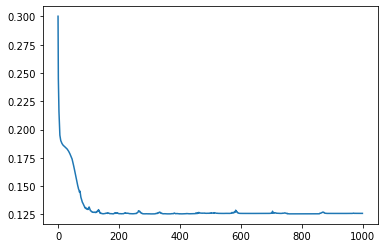

In [146]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.show()